Found 981 images belonging to 3 classes.
Found 244 images belonging to 3 classes.
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/50
30/30 [==============================] - 637s 21s/step - loss: 2.0814 - accuracy: 0.6154 - val_loss: 0.5843 - val_accuracy: 0.7589
Epoch 2/50
30/30 [==============================] - 33s 1s/step - loss: 0.5294 - accuracy: 0.7661 - val_loss: 0.4578 - val_accuracy: 0.7768
Epoch 3/50
30/30 [==============================] - 26s 869ms/step - loss: 0.4429 - accuracy: 0.8251 - val_loss: 0.4002 - val_accuracy: 0.8259
Epoch 4/50
30/30 [==============================] - 26s 872ms/step - loss: 0.3750 - accuracy: 0.8388 - val_loss: 0.3100 - val_accuracy: 0.8705
Epoch 5/50
30/30 [==============================] - 26s 869ms/step - loss: 0.3661 - accuracy: 0.8483 - val_loss: 0.2989 - val_accuracy: 0.8795
Epoch 6/50
30/30 [==============================] - 31s 1s/step - loss: 0.3461 - accuracy: 0.8577 - val_loss: 0.3195 - val_accuracy: 0.8571
Ep

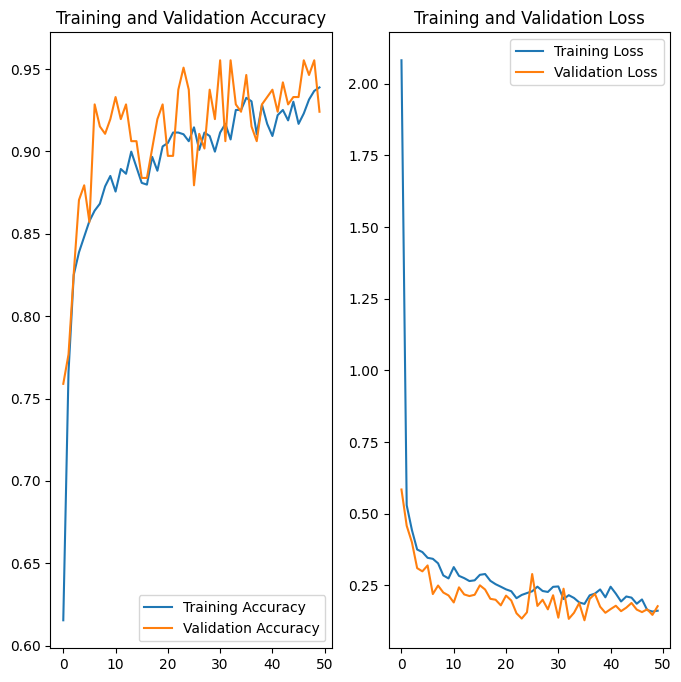

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import all the necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3
AUTOTUNE = tf.data.AUTOTUNE
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/Potato Disease Classification/potato-disease-classification-main/PlantVillage"  # Update this with your dataset directory

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load the pretrained VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze the layers of the pretrained model
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification layers on top of the pretrained model
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the model
model.save("potato_disease_classification_model.h5")
